# Operator

Operator class is used in Qiskit to represent matrix operators acting on a quantum system

Operator.is_unitary() function, which will return True if the operator is unitary and False otherwise.

Reference:

https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

In [1]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import *
from qiskit.extensions import XGate,HGate
from qiskit import QuantumCircuit,BasicAer,execute

# create an operator object is to initialize it with a matrix given as a list or a Numpy array.

In [2]:
X=Operator([[0,1],[1,0]])

In [3]:
X

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [4]:
X.data

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [5]:
array_to_latex(X.data)

<IPython.core.display.Latex object>

# Create an Operator from a Pauli object

In [6]:
pauli_Xgate = Pauli(label='X')
Operator(pauli_Xgate)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [7]:
array_to_latex(Operator(pauli_Xgate).data)

<IPython.core.display.Latex object>

In [8]:
Operator(pauli_Xgate).is_unitary()

True

# Create an Operator for a Gate object

In [9]:
Operator(XGate())

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [10]:
array_to_latex(Operator(XGate()).data)

<IPython.core.display.Latex object>

# Create an operator from a QuantumCircuit object


In [11]:
qc = QuantumCircuit(1)
qc.x(0)

# Convert circuit to an operator by implicit unitary simulation
Operator(qc)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [12]:
array_to_latex(Operator(qc).data)

<IPython.core.display.Latex object>

# Using Operators in circuits

### QuantumCircuit.append(): Unitary Operators can be directly inserted into a QuantumCircuit 

### append() converts the Operator into a UnitaryGate object and  added to the circuit.

If the operator is not unitary throws QiskitError

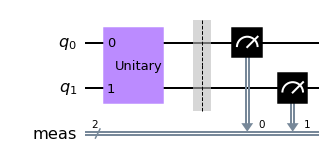

In [13]:
#Create an operator

XX = Operator(Pauli(label='XX'))

# Add to a circuit
qc = QuantumCircuit(2)
qc.append(XX, [0,1])
qc.measure_all()
qc.draw('mpl')

In [14]:
#Get the backend
backend=BasicAer.get_backend('qasm_simulator')

job=backend.run(qc)
result=job.result()
counts=result.get_counts()
print(counts)


{'11': 1024}


# Pauli object may also be directly inserted into the circuit itself

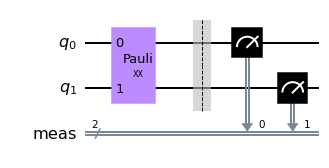

In [15]:
# Add to a circuit
qc = QuantumCircuit(2)
qc.append(Pauli(label='XX'), [0,1])
qc.measure_all()
qc.draw('mpl')

In [17]:
#Get the backend
backend=BasicAer.get_backend('qasm_simulator')

job=execute(qc,backend)
result=job.result()
counts=result.get_counts()
print(counts)

{'11': 1024}


In [18]:
array_to_latex(Operator(HGate()).data)

<IPython.core.display.Latex object>